# Trainingdata Sentiwordnet with stopword cleaning

In [1]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create statistics and visualize data
import seaborn as sns 
from sklearn.metrics import * # to calculate the metrics
from nltk.corpus import sentiwordnet as swn # model that is used

setting to show full text content

In [2]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [4]:
df_sentiwordnet_without_stopwords = pd.read_csv('../../Data-Preparation/sentiment140/traindata_without_stopwords_preprocessed.csv')

In [5]:
df_sentiwordnet_without_stopwords['target'].value_counts()

target
0    486400
4    486400
Name: count, dtype: int64

In [6]:
df_sentiwordnet_without_stopwords.head()

,Text,Ground_Truth_Label,target
0,wow wise fear elevators incredible love demi,negative,0
1,hahaha bored haha plane crash scary,negative,0
2,Sure following,positive,4
3,itunes say download OS3 yet mine says OS date,negative,0
4,French Mauritian speak French Good luck learning,negative,0


In [7]:
df_sentiwordnet_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>      967917
<class 'float'>      4883
Name: count, dtype: int64

In [8]:
df_sentiwordnet_without_stopwords['Text'] = df_sentiwordnet_without_stopwords['Text'].astype(str)


In [9]:
df_sentiwordnet_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>    972800
Name: count, dtype: int64

## Classifying sentiments 

This classifier calculates the average sentiment score of all possible meanings (lemmas) of a word. It doesn't consider the context in which the word is used but instead provides a general average sentiment score based on all its meanings.

In [10]:
def naiveSentiment(review):
    reviewPolarity = 0.0
    numExceptions = 0
    words = review.lower().split()
    
    for word in words:
        numMeanings = 0
        weight = 0.0
        synsets = list(swn.senti_synsets(word))
        if synsets:
            for meaning in synsets:
                pos_score = meaning.pos_score()
                neg_score = meaning.neg_score()
                if pos_score > neg_score:
                    weight += (pos_score - neg_score)
                    numMeanings += 1
                elif pos_score < neg_score:
                    weight -= (neg_score - pos_score)
                    numMeanings += 1
        else:
            numExceptions += 1
        if numMeanings > 0:
            reviewPolarity += (weight / numMeanings)
    return reviewPolarity

In [11]:
df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'] = df_sentiwordnet_without_stopwords['Text'].apply(lambda x: 'positive' if naiveSentiment(x) >= 0 else 'negative')


In [ ]:
df_sentiwordnet_without_stopwords

,Text,target,Ground_Truth_Label,Sentiwordnet_Classification
0,Rise shining lol mins later planned rush door time,4,positive,positive
1,2nd interview today looking promising,4,positive,positive
2,feel pain,0,negative,negative
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive,positive
4,lonely housemates gone pub,0,negative,negative
...,...,...,...,...
1279995,held together bubblegum amp blessings,4,positive,positive
1279996,Heehee one,4,positive,positive
1279997,welcome change mind though let know,4,positive,positive
1279998,BET Bring Backup,4,positive,negative


## Testing quality of the classifier on training data

In [ ]:
accuracy = accuracy_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])
precision = precision_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')
recall = recall_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')
f1 = f1_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'],beta=beta, pos_label='positive')

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.61
Precision: 0.58
Recall: 0.79
F1 Score: 0.67


In [ ]:
print("\nClassification Report:\n")
print(classification_report(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.67      0.43      0.52    640000
    positive       0.58      0.79      0.67    640000

    accuracy                           0.61   1280000
   macro avg       0.62      0.61      0.59   1280000
weighted avg       0.62      0.61      0.59   1280000



creating heatmap to visualize false positives and false negatives

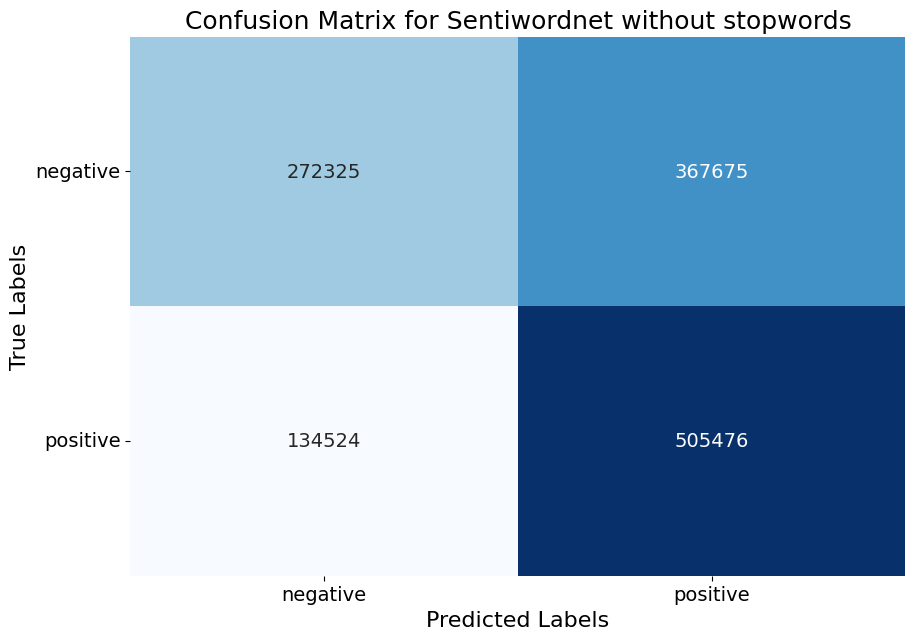

In [ ]:
cm_nb = confusion_matrix(df_sentiwordnet_without_stopwords['Ground_Truth_Label'], df_sentiwordnet_without_stopwords['Sentiwordnet_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Sentiwordnet without stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()